## Text preparation 

We need to build a vocabulary.

In [0]:
# Mounted Drive if using Colab; otherwise, your local path
root = "/content/drive/My Drive/Artificial Intelligence/CW2/Dataset/"
caption_dir = root + "Flickr8k_text/"                    
image_dir = root + "Flicker8k_Dataset/"    

token_file = "Flickr8k.token.txt"
lemma_token_file = "Flickr8k.lemma.token.txt" 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A helper function to read in our ground truth text file.

In [0]:
def read_lines(filepath):
    """ Open the ground truth captions into memory, line by line. """
    file = open(filepath, 'r')
    lines = []

    while True: 
        # Get next line from file until there's no more
        line = file.readline() 
        if not line: 
            break
        lines.append(line.strip())
    file.close() 
    return lines

You can read all the ground truth captions (5 per image), into memory as follows:

In [0]:
lines = read_lines(caption_dir + token_file) #Flickr8k.token.txt
lemma_lines = read_lines(caption_dir + lemma_token_file) #Flickr8k.lemma.token.txt

In [0]:
print(lines[:5])
print(lemma_lines[:5]) #use 'lemma_lines' to store the lines for Flickr8k.lemma.token.txt

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .', '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .', '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .', '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .', '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .']
["1305564994_00513f9a5b.jpg#0\tA man in street racer armor be examine the tire of another racer 's motorbike .", '1305564994_00513f9a5b.jpg#1\tTwo racer drive a white bike down a road .', '1305564994_00513f9a5b.jpg#2\tTwo motorist be ride along on their vehicle that be oddly design and color .', '1305564994_00513f9a5b.jpg#3\tTwo person be in a small race car drive by a green hill .', '1305564994_00513f9a5b.jpg#4\tTwo person in race uniform in a street car .']


In [0]:
class Vocabulary(object):
    """Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # Intially, set both the IDs and words to empty dictionaries.
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        # If the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx #把idx赋值给键word
            self.idx2word[self.idx] = word #把word赋值给键idx
            # Increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # If we try to access a word in the dictionary which does not exist, return the <unk> id
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

Extract all the words from ```lines```, and create a list of them in a variable ```words```, for example:

```words = ["a", "an", "the", "cat"... ]```

No need to worry about duplicates.


In [0]:
print(len(lines))
print(len(lemma_lines))

40455
40455


####Text Preparation

In [0]:
from itertools import chain
from collections import Counter
import nltk
#Text Preparation
def TextPreparation(lines):
  sentences = [lines[i].split()[1:] for i in range(len(lines))] #splitting ID, trim whitespaces.

  for i in range(len(sentences)):
    sentences[i] = [''.join(c for c in word if c.isalnum()) for word in sentences[i]] #remove punctuation
    sentences[i] = [word.lower() for word in sentences[i]] #Convert lowercase
    sentences[i] = [word for word in sentences[i] if word != ''] #remove empty

  words = list(chain(*sentences)) #merge
  result = Counter(words) #use 'Counter' to count the number of occurrences
  infrequent_words = [word for word in result if result[word] < 4]#define infrequent words list 
  words = [word for word in words if word not in infrequent_words]
  
  return words, sentences, infrequent_words

In [0]:
words, sentences, infrequent_words = TextPreparation(lines)
lemma_words, lemma_sentences, lemma_infrequent_words = TextPreparation(lemma_lines)
print(words[:20])
print(sentences[:10])
print(infrequent_words[:10])

['a', 'child', 'in', 'a', 'pink', 'dress', 'is', 'climbing', 'up', 'a', 'set', 'of', 'stairs', 'in', 'an', 'way', 'a', 'girl', 'going', 'into']
[['a', 'child', 'in', 'a', 'pink', 'dress', 'is', 'climbing', 'up', 'a', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way'], ['a', 'girl', 'going', 'into', 'a', 'wooden', 'building'], ['a', 'little', 'girl', 'climbing', 'into', 'a', 'wooden', 'playhouse'], ['a', 'little', 'girl', 'climbing', 'the', 'stairs', 'to', 'her', 'playhouse'], ['a', 'little', 'girl', 'in', 'a', 'pink', 'dress', 'going', 'into', 'a', 'wooden', 'cabin'], ['a', 'black', 'dog', 'and', 'a', 'spotted', 'dog', 'are', 'fighting'], ['a', 'black', 'dog', 'and', 'a', 'tricolored', 'dog', 'playing', 'with', 'each', 'other', 'on', 'the', 'road'], ['a', 'black', 'dog', 'and', 'a', 'white', 'dog', 'with', 'brown', 'spots', 'are', 'staring', 'at', 'each', 'other', 'in', 'the', 'street'], ['two', 'dogs', 'of', 'different', 'breeds', 'looking', 'at', 'each', 'other', 'on', 'the', 'road']

Build the vocabulary.

In [0]:
# Create a vocab instance
vocab = Vocabulary()
lemma_vocab = Vocabulary() #use lemma_vocab to store the words from lemmatized token

# Add the token words first
vocab.add_word('<pad>')
vocab.add_word('<start>')
vocab.add_word('<end>')
vocab.add_word('<unk>')

lemma_vocab.add_word('<pad>')
lemma_vocab.add_word('<start>')
lemma_vocab.add_word('<end>')
lemma_vocab.add_word('<unk>')

Add the rest of the words from the parsed captions:

``` vocab.add_word('new_word')```

Don't add words that appear three times or less.

In [0]:
for new_word in words:
  vocab.add_word(new_word)

for lemma_word in lemma_words:
  lemma_vocab.add_word(lemma_word)

In [0]:
dict(list(vocab.word2idx.items())[:10])

{'<end>': 2,
 '<pad>': 0,
 '<start>': 1,
 '<unk>': 3,
 'a': 4,
 'child': 5,
 'dress': 8,
 'in': 6,
 'is': 9,
 'pink': 7}

In [0]:
print(len(vocab))
print(len(lemma_vocab))

3440
2655


## Dataset and loaders for training

Keeping the same order, concatenate all the cleaned words from each caption into a string again, and add them all to a list of strings ```cleaned_captions```. Store all the image ids in a list ```image_ids```.

In [0]:
cleaned_captions = [' '.join(sentences[i]) for i in range(len(sentences))] #define cleaned captions 
image_ids = [lines[i].split('.jpg')[0] for i in range(len(lines))] #define image IDs

print(cleaned_captions[:5])
print(image_ids[:5])

['a child in a pink dress is climbing up a set of stairs in an entry way', 'a girl going into a wooden building', 'a little girl climbing into a wooden playhouse', 'a little girl climbing the stairs to her playhouse', 'a little girl in a pink dress going into a wooden cabin']
['1000268201_693b08cb0e', '1000268201_693b08cb0e', '1000268201_693b08cb0e', '1000268201_693b08cb0e', '1000268201_693b08cb0e']


In [0]:
lemma_cleaned_captions = [' '.join(lemma_sentences[i]) for i in range(len(lemma_sentences))]
lemma_image_ids = [lemma_lines[i].split('.jpg')[0] for i in range(len(lemma_lines))]

The dataframe for the image paths and captions.

In [0]:
import pandas as pd

data = {
    'image_id': image_ids,
    'path': [image_dir + image_id + ".jpg" for image_id in image_ids],
    'caption': cleaned_captions
}

data_df = pd.DataFrame(data, columns=['image_id', 'path', 'caption'])

In [0]:
data_df.head(n= 5)

,image_id,path,caption
0,1000268201_693b08cb0e,/content/drive/My Drive/Artificial Intelligenc...,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e,/content/drive/My Drive/Artificial Intelligenc...,a girl going into a wooden building
2,1000268201_693b08cb0e,/content/drive/My Drive/Artificial Intelligenc...,a little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e,/content/drive/My Drive/Artificial Intelligenc...,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e,/content/drive/My Drive/Artificial Intelligenc...,a little girl in a pink dress going into a woo...


In [0]:
lemma_data = {
    'image_id': lemma_image_ids,
    'path': [image_dir + lemma_image_id + ".jpg" for lemma_image_id in lemma_image_ids],
    'caption': lemma_cleaned_captions
}

lemma_data_df = pd.DataFrame(lemma_data, columns=['image_id', 'path', 'caption'])

This is the Flickr8k class for the dataset.

In [0]:
from PIL import Image
import cv2
from nltk import tokenize
from torch.utils.data import Dataset

class Flickr8k(Dataset):
    """ Flickr8k custom dataset compatible with torch.utils.data.DataLoader. """
    
    def __init__(self, df, vocab, transform=None):
        """ Set the path for images, captions and vocabulary wrapper.
      
        Args:
            df: df containing image paths and captions.
            vocab: vocabulary wrapper.
            transform: image transformer.
        """
        self.df = df
        self.vocab = vocab
        self.transform = transform

    def __getitem__(self, index):
        """ Returns one data pair (image and caption). """

        vocab = self.vocab

        caption = self.df['caption'][index]
        img_id = self.df['image_id'][index]
        path = self.df['path'][index]

        image = Image.open(open(path, 'rb'))

        if self.transform is not None:
            image = self.transform(image)

        # Convert caption (string) to word ids.
        tokens = caption.split()
        caption = [] #初始化空列表
        # Build the Tensor version of the caption, with token words
        #此代码将任何字符串值的标题转换为整数列表
        caption.append(vocab('<start>')) #附加一个整数(1)标记为start作为开头
        caption.extend([vocab(token) for token in tokens]) #添加与标题中每个标记相对应的整数来继续列表。
        caption.append(vocab('<end>')) #0和1分别作为一个caption的start, end. 
        target = torch.Tensor(caption)
        return image, target

    def __len__(self):
        return len(self.df)

We need to overwrite the default PyTorch ```collate_fn()``` because our ground truth captions are sequential data of varying lengths. The default ```collate_fn()``` does not support merging the captions with padding.

You can read more about it here: https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 

In [0]:
def caption_collate_fn(data):
    """ Creates mini-batch tensors from the list of tuples (image, caption).
    Args:
        data: list of tuple (image, caption). 
            - image: torch tensor of shape (3, 256, 256).
            - caption: torch tensor of shape (?); variable length.
    Returns:
        images: torch tensor of shape (batch_size, 3, 256, 256).
        targets: torch tensor of shape (batch_size, padded_length).
        lengths: list; valid length for each padded caption.
    """
    # Sort a data list by caption length from longest to shortest.
    data.sort(key=lambda x: len(x[1]), reverse=True)
    images, captions = zip(*data)

    # Merge images (from tuple of 3D tensor to 4D tensor).
    images = torch.stack(images, 0)

    # Merge captions (from tuple of 1D tensor to 2D tensor).
    lengths = [len(cap) for cap in captions]
    targets = torch.zeros(len(captions), max(lengths)).long()
    for i, cap in enumerate(captions):
        end = lengths[i]
        targets[i, :end] = cap[:end]        
    return images, targets, lengths

Now we define the data transform.

In [0]:
from torchvision import transforms

# Crop size matches the input dimensions expected by the pre-trained ResNet
data_transform = transforms.Compose([ 
    transforms.Resize(224),
    transforms.CenterCrop(224),  #将图片从中心裁剪成224*224
    transforms.ToTensor(),
    transforms.Normalize(std = (0.485, 0.456, 0.406),   # Using ImageNet norms
                         mean = (0.229, 0.224, 0.225))])

Initialising the datasets. The only twist is that every image has 5 ground truth captions, so each image appears five times in the dataframe. We don't want an image to appear in more than one set.

In [0]:
unit_size = 5

train_split = 0.95 # Defines the ratio of train/test data.

# We didn't shuffle the dataframe yet so this works
train_size = unit_size * round(len(data_df)*train_split / unit_size) #round()返回浮点数x的四舍五入值

dataset_train = Flickr8k(
    #https://blog.csdn.net/cuit2016123070/article/details/83624074
    df=data_df[:train_size].reset_index(drop=True), #drop-默认为True，删除用作新索引的列(序号). append-默认为False，是否将列附加到现有索引. inplace-默认为False，适当修改DataFrame(不要创建新对象)
    vocab=vocab,                                    #verify_integrity-默认为false，检查新索引的副本。否则，请将检查推迟到必要时进行。将其设置为false将提高该方法的性能。
    transform=data_transform,
)

dataset_test = Flickr8k(
    df=data_df[train_size:].reset_index(drop=True),
    vocab=vocab, #3440
    transform=data_transform,
)

In [0]:
lemma_dataset_train = Flickr8k(
    df=lemma_data_df[:train_size].reset_index(drop=True),
    vocab=lemma_vocab,                                    
    transform=data_transform,
)

lemma_dataset_test = Flickr8k(
    df=lemma_data_df[train_size:].reset_index(drop=True),
    vocab=lemma_vocab,
    transform=data_transform,
)

Write the dataloaders ```train_loader``` and ```test_loader``` - explicitly replacing the collate_fn:

```train_loader = torch.utils.data.DataLoader(
  ...,
  collate_fn=caption_collate_fn
)```

Set train batch size to 128 and be sure to set ```shuffle=True```

In [0]:
import torch

train_loader = torch.utils.data.DataLoader(
    dataset = dataset_train,
    batch_size = 128,
    shuffle = True,
    num_workers = 2,
    collate_fn=caption_collate_fn )

test_loader = torch.utils.data.DataLoader(
    dataset = dataset_test,
    batch_size = 1,
    shuffle = False,
    num_workers = 2,
    collate_fn = caption_collate_fn
)

In [0]:
lemma_train_loader = torch.utils.data.DataLoader(
    dataset = lemma_dataset_train,
    batch_size = 128,
    shuffle = True,
    num_workers = 2,
    collate_fn=caption_collate_fn )

lemma_test_loader = torch.utils.data.DataLoader(
    dataset = lemma_dataset_test,
    batch_size = 1,
    shuffle = False,
    num_workers = 2,
    collate_fn = caption_collate_fn
)

## Encoder and decoder models

In [0]:
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence

class EncoderCNN(nn.Module):
    def __init__(self, embed_size): #embed_size作为输入
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()
        resnet = models.resnet152(pretrained=True) # Pre-trained on ImageNet by default
        layers = list(resnet.children())[:-1]      # Keep all layers except the last one 删除最后一个fc图层。
        # Unpack the layers and create a new Sequential
        self.resnet = nn.Sequential(*layers)

        # We want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 1000)
        # into a Linear layer to resize
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)
  
        # Batch normalisation helps to speed up training
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        
        # Complete graph here. Remember to put the ResNet layer in a with torch.no_grad() block
        with torch.no_grad():
          features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))

        return features

#RNN decoder
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        
        # What is an embedding layer?
        self.embed = nn.Embedding(vocab_size, embed_size)

        #RNN
        #1、权值共享,所有W全是相同的，U和V也一样。https://blog.csdn.net/lwgkzl/article/details/88717678
        #2、每一个输入值都只与它本身的那条路线建立权连接，不会和别的神经元连接。https://blog.csdn.net/zhaojc1995/article/details/80572098
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers, batch_first = True)
        
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        
    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1) #拼接张量 0 - 行拼接, 1 - 列拼接
        # What is "packing" a padded sequence?
        #lengths需要从大到小排序，embeddings为已根据长度大小排好序，batch_first如果设置为true，则embeddings的第一维为batch_size，第二维为seq_length，否则相反。 
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True)  #https://blog.csdn.net/lssc4205/article/details/79474735
        hiddens, _ = self.rnn(packed) # Replace with self.rnn when using RNN
        outputs = self.linear(hiddens[0])
        return outputs
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)          # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))            # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)                        # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                         # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)                # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


#LSTM decoder
class DecoderLSTM(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        """Set the hyper-parameters and build the layers."""
        super(DecoderLSTM, self).__init__()
        
        # What is an embedding layer?
        self.embed = nn.Embedding(vocab_size, embed_size)

        #RNN
        #1、权值共享,所有W全是相同的，U和V也一样。https://blog.csdn.net/lwgkzl/article/details/88717678
        #2、每一个输入值都只与它本身的那条路线建立权连接，不会和别的神经元连接。https://blog.csdn.net/zhaojc1995/article/details/80572098
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first = True)
        
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        
    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1) #拼接张量 0 - 行拼接, 1 - 列拼接
        # What is "packing" a padded sequence?
        #lengths需要从大到小排序，embeddings为已根据长度大小排好序，batch_first如果设置为true，则embeddings的第一维为batch_size，第二维为seq_length，否则相反。 
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True)  #https://blog.csdn.net/lssc4205/article/details/79474735
        hiddens, _ = self.lstm(packed) # Replace with self.rnn when using RNN
        outputs = self.linear(hiddens[0])
        return outputs
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.lstm(inputs, states)          # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))            # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)                        # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)                       # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                         # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)                # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids

In [0]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Set training parameters.

The encoder that we provide to you uses the pre-trained ResNet-50 architecture (with the final fully-connected layer removed) to extract features from a batch of pre-processed images. The output is then flattened to a vector, before being passed through a Linear layer to transform the feature vector to have the same size as the word embedding.
![alt text](https://raw.githubusercontent.com/Noob-can-Compile/Automatic-Image-Captioning/261698a775ea1e077af6c9407521dcd4d8f666a8/images/encoder-decoder.png)

In [0]:
embed_size = 256 #图像嵌入尺寸，CNN的输入参数，对应RNN decoder输入的维度
hidden_size = 512
num_layers = 1
learning_rate = 0.001
num_epochs = 5
log_step = 10
save_step = 1

Initialize the models and set the learning parameters.

In [0]:
import numpy as np

def build_models():
  global encoder,decoder_rnn,decoder_lstm,criterion,params_rnn,params_lstm,optimizer_rnn,optimizer_lstm
  # Build the models
  encoder = EncoderCNN(embed_size).to(device)
  decoder_rnn = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers).to(device)
  decoder_lstm = DecoderLSTM(embed_size, hidden_size, len(vocab), num_layers).to(device)

  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()

  # Optimisation will be on the parameters of BOTH the enocder and decoder,
  # but excluding the ResNet parameters, only the new added layers.
  params_rnn = list(
      decoder_rnn.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters()
  )
  params_lstm = list(
      decoder_lstm.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters()
  )

  optimizer_rnn = torch.optim.Adam(params_rnn, lr=learning_rate)
  optimizer_lstm = torch.optim.Adam(params_lstm, lr=learning_rate)


In [0]:
build_models()

## Training the model

The loop to train the model. Feel free to put this in a function if you prefer.

In [0]:
#define a dataset contains only 2 images
dataset_images = Flickr8k(
    df=data_df[(train_size+4):(train_size+6)].reset_index(drop=True),
    vocab=vocab,
    transform=data_transform,
)

images_loader = torch.utils.data.DataLoader(
    dataset = dataset_images,
    batch_size = 1,
    shuffle = False,
    num_workers = 2,
    collate_fn = caption_collate_fn
)

In [0]:
#generation predicted caption
def generate_predict(features, decoder):
  '''Pass the features from the encoder into the decoder sample() function.'''
  words_sequence = []
  generated_captions = decoder.sample(features)
  generated_captions = [int(caption) for caption in generated_captions[0]]
  for i in generated_captions:
    if i == 1 or i == 2 or i == 3:
      continue
    words_sequence.append(vocab.idx2word[i])
  sentence = ' '.join(words_sequence) 
  return sentence

In [0]:
def display_image(images):
  image = images.cpu()
  image = image.squeeze(0).numpy()
  #normalize image
  image = (image - np.mean(image)) / np.std(image)
  image = np.minimum(1, np.maximum(0, image+0.5))
  image = image.transpose(1,2,0)
  plt.imshow(image)
  plt.show()

In [0]:
rnn_loss = [] 
lstm_loss = []
rnn_bleu = []
lstm_bleu = []
short_score_rnn = []
short_score_lstm = []
long_score_rnn = []
long_score_lstm = []

####train model for RNN

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
import os

# Train the models
def train_model_rnn():
  global encoder
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      #generates a sample caption from two test set images before any training and after each epoch
      print('Sample captions:',end = '\n--------------------------------------------\n')
      print(images_loader.dataset.df.loc[0,'caption'])
      print(images_loader.dataset.df.loc[1,'caption'],end = '\n--------------------------------------------\n')

      for i, (images, captions, lengths) in enumerate(train_loader): #组合为一个索引序列，同时列出数据和数据下标

          # Set mini-batch dataset
          images = images.to(device)
          captions = captions.to(device)

          # Packed as well as we'll compare to the decoder outputs
          targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]

          # Forward, backward and optimize
          features = encoder(images)
          outputs = decoder_rnn(features, captions, lengths)

          loss = criterion(outputs, targets)
          
          # Zero gradients for both networks
          decoder_rnn.zero_grad() # 梯度清零
          encoder.zero_grad()

          loss.backward()
          optimizer_rnn.step()

          # Print log info
          if i % log_step == 0:
              print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch, num_epochs, i, total_step, loss.item()))
          #Add loss for each epoch to a list
          if i == (total_step - 1):
            rnn_loss.append(loss.item())

          # # If you want to save the model checkpoints - recommended once you have everything working
          # # Make sure to save RNN and LSTM versions separately
          # model_path = '/content/drive/My Drive/Artificial Intelligence/CW2/model path/'
          # encoder_path = 'decoder-{}-{}.ckpt'.format(epoch+1, i+1)
          # decoder_path = 'encoder-{}-{}.ckpt'.format(epoch+1, i+1)
          # if not os.path.exists(model_path):
          #   os.makedirs(model_path)
       
          # if (i+1) % save_step == 0:
          #   torch.save(decoder.state_dict(), os.path.join(model_path, encoder_path))
          #   torch.save(decoder.state_dict(), os.path.join(model_path, decoder_path))
            

      with torch.no_grad(): #https://blog.csdn.net/weixin_43178406/article/details/89517008
          encoder = encoder.eval() #freezes the parameters of the batch norm layer
          #from defined data loader to load data to output the generated captions and BLEU socres
          for i, (images, captions, lengths) in enumerate(images_loader):
              images = images.to(device)
              features = encoder(images)
              
              display_image(images) #display sample images

              reference_caption_path = 'test_loader.dataset.df.caption[{}:{}]'.format(5*i,(5*i)+5) #reference captions path
              reference_caption = eval(reference_caption_path) #get reference captions

              #display reference captions
              reference = []
              print('REFERENCE CAPTIONS:',end = '\n'+'-'*60+'\n')
              for j in reference_caption:
                reference.append(j.split())
                print(j)
              print(end = '-'*60+'\n\n')

              #display generated captions
              print('GENERATED CAPTIONS:')
              print(generate_predict(features, decoder_rnn), end = '\n\n')

              #display the BLEU score
              candidate = generate_predict(features, decoder_rnn).split()
              smooth = SmoothingFunction()  # 定义平滑函数对象
              # score = sentence_bleu(reference, candidate,weights = (0.5, 0.5, 0, 0), smoothing_function=smooth.method1)#积累n-gram (默认)
              score = sentence_bleu(reference, candidate, weights = (0.5,0.25,0.15,0.1))
              # #两个句子都必须用一系列tokens表示                         独立n-gram
              # score = sentence_bleu(reference, candidate, weights = (1,0,0,0)) #https://blog.csdn.net/g11d111/article/details/100103208
              print("BLEU score:")
              print(score, end = '\n\n')


          #load test loader to generate the BLEU scores    
          scores = []
          short_score = []
          long_score = []
          for i, (images, captions, lengths) in enumerate(test_loader):
              images = images.to(device)
              features = encoder(images)

              if i % 5 == 0: #Generate a caption and 5 reference captions of each image
                reference = []
                reference_caption_path = 'test_loader.dataset.df.caption[{}:{}]'.format(i,i+5) #reference captions path
                reference_caption = eval(reference_caption_path) #get reference captions
                for j in reference_caption:
                  reference.append(j.split()) #convert to token - e.g. convert 'a little girl' to ['a', 'little', 'girl']
                candidate = generate_predict(features, decoder_rnn).split() #generated caption for RNN
                score = sentence_bleu(reference, candidate, weights = (0.5,0.25,0.15,0.1))
                scores.append(score) 

              #compare the performance on Long captions vs. Short captions 
              each_ref = test_loader.dataset.df.caption[i].split()
              caption_rnn = generate_predict(features, decoder_rnn).split() #generated caption for RNN 
              score_rnn = sentence_bleu(each_ref, caption_rnn, weights = (0.5,0.25,0.15,0.1))#calculate the BLEU score for generated caption(each reference)
              if len(caption_rnn) < len(each_ref): #short caption is shorter than reference
                short_score.append(score_rnn) 
              else:                                #long caption is longer than reference                         
                long_score.append(score_rnn) 
              
          rnn_bleu.append(scores)
          short_score_rnn.append(short_score)
          long_score_rnn.append(long_score)
          encoder = encoder.train() #undo the eval() mode

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [0/5], Step [0/301], Loss: 8.1472
Epoch [0/5], Step [10/301], Loss: 5.3692
Epoch [0/5], Step [20/301], Loss: 5.0061
Epoch [0/5], Step [30/301], Loss: 4.7513
Epoch [0/5], Step [40/301], Loss: 4.4860
Epoch [0/5], Step [50/301], Loss: 4.2222
Epoch [0/5], Step [60/301], Loss: 3.9381
Epoch [0/5], Step [70/301], Loss: 3.9208
Epoch [0/5], Step [80/301], Loss: 3.8231
Epoch [0/5], Step [90/301], Loss: 3.6489
Epoch [0/5], Step [100/301], Loss: 3.6283
Epoch [0/5], Step [110/301], Loss: 3.6272
Epoch [0/5], Step [120/301], Loss: 3.5742
Epoch [0/5], Step [130/301], Loss: 3.4118
Epoch [0/5], Step [140/301], Loss: 3.5633
Epoch [0/5], Step [150/301], Loss: 3.4896
Epoch [0/5], Step [160/301], Loss: 3.4155
Epoch [0/5], Step [170/301], Loss: 3.2058
Epoch [0/5], Step [180/301], Loss: 3.2994
Epoch [0/5], St

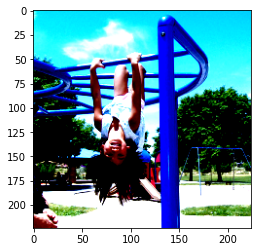

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a little girl in a blue shirt is jumping over a hurdle

BLEU score:
0.5773502691896257



/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


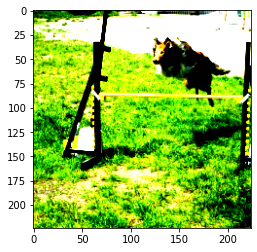

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog jumps over a hurdle

BLEU score:
0.4991521688112304



/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [1/5], Step [0/301], Loss: 2.9640
Epoch [1/5], Step [10/301], Loss: 2.9976
Epoch [1/5], Step [20/301], Loss: 2.9973
Epoch [1/5], Step [30/301], Loss: 2.9717
Epoch [1/5], Step [40/301], Loss: 2.8484
Epoch [1/5], Step [50/301], Loss: 3.0123
Epoch [1/5], Step [60/301], Loss: 2.9164
Epoch [1/5], Step [70/301], Loss: 2.8081
Epoch [1/5], Step [80/301], Loss: 2.9490
Epoch [1/5], Step [90/301], Loss: 2.8242
Epoch [1/5], Step [100/301], Loss: 2.8949
Epoch [1/5], Step [110/301], Loss: 2.8528
Epoch [1/5], Step [120/301], Loss: 2.9139
Epoch [1/5], Step [130/301], Loss: 2.8318
Epoch [1/5], Step [140/301], Loss: 2.8904
Epoch [1/5], Step [150/301], Loss: 2.8321
Epoch [1/5], Step [160/301], Loss: 2.9652
Epoch [1/5], Step [170/301], Loss: 2.8454
Epoch [1/5], Step [180/301], Loss: 2.8506
Epoch [1/5], St

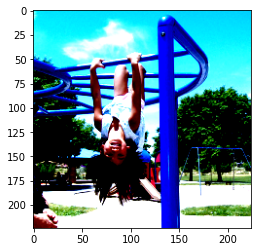

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a young boy is jumping into a pool

BLEU score:
0.3764793186596844



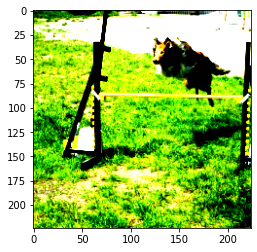

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog is running through the grass a dog

BLEU score:
0.59210882479399

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [2/5], Step [0/301], Loss: 2.6108
Epoch [2/5], Step [10/301], Loss: 2.6963
Epoch [2/5], Step [20/301], Loss: 2.7667
Epoch [2/5], Step [30/301], Loss: 2.5953
Epoch [2/5], Step [40/301], Loss: 2.6952
Epoch [2/5], Step [50/301], Loss: 2.5739
Epoch [2/5], Step [60/301], Loss: 2.7466
Epoch [2/5], Step [70/301], Loss: 2.6128
Epoch [2/5], 

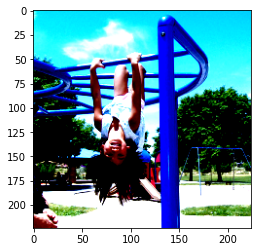

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a child is jumping on a swing

BLEU score:
0.4829955873586442



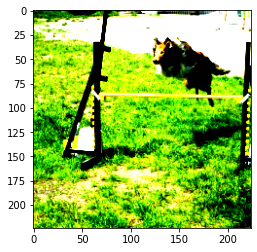

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog is jumping over a hurdle

BLEU score:
0.7875645945599546

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [3/5], Step [0/301], Loss: 2.5828
Epoch [3/5], Step [10/301], Loss: 2.4016
Epoch [3/5], Step [20/301], Loss: 2.4042
Epoch [3/5], Step [30/301], Loss: 2.3983
Epoch [3/5], Step [40/301], Loss: 2.4910
Epoch [3/5], Step [50/301], Loss: 2.5932
Epoch [3/5], Step [60/301], Loss: 2.5162
Epoch [3/5], Step [70/301], Loss: 2.3468
Epoch [3/5], Step [80

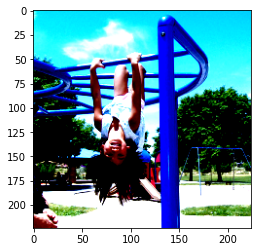

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a young boy is jumping on a trampoline

BLEU score:
0.43472087194499137



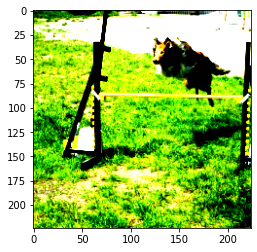

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog is jumping over a hurdle

BLEU score:
0.7875645945599546

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [4/5], Step [0/301], Loss: 2.3335
Epoch [4/5], Step [10/301], Loss: 2.4348
Epoch [4/5], Step [20/301], Loss: 2.2941
Epoch [4/5], Step [30/301], Loss: 2.2577
Epoch [4/5], Step [40/301], Loss: 2.2170
Epoch [4/5], Step [50/301], Loss: 2.3314
Epoch [4/5], Step [60/301], Loss: 2.2843
Epoch [4/5], Step [70/301], Loss: 2.3306
Epoch [4/5], Step [80

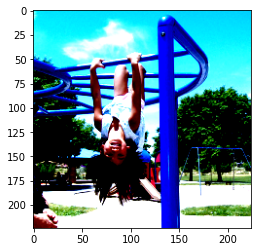

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a child in a red shirt is playing in a sprinkler

BLEU score:
0.3096366331938332



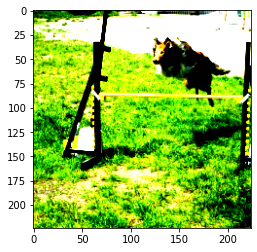

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a black and white dog is jumping over a red and white pole

BLEU score:
0.4159911591551323



In [0]:
train_model_rnn()

####train model for LSTM

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
import os

# Train the models
def train_model_lstm():
  global encoder
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      #generates a sample caption from two test set images before any training and after each epoch
      print('Sample captions:',end = '\n--------------------------------------------\n')
      print(images_loader.dataset.df.loc[0,'caption'])
      print(images_loader.dataset.df.loc[1,'caption'],end = '\n--------------------------------------------\n')

      for i, (images, captions, lengths) in enumerate(train_loader):
          images = images.to(device)
          captions = captions.to(device)
          targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
          features = encoder(images)
          outputs = decoder_lstm(features, captions, lengths)
          loss = criterion(outputs, targets)
          decoder_lstm.zero_grad()
          encoder.zero_grad()
          loss.backward()
          optimizer_lstm.step()

          if i % log_step == 0:
              print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch, num_epochs, i, total_step, loss.item()))
          if i == (total_step - 1):
            lstm_loss.append(loss.item())


      with torch.no_grad():
          encoder = encoder.eval()
          for i, (images, captions, lengths) in enumerate(images_loader):
              images = images.to(device)
              features = encoder(images)

              display_image(images) #display sample images

              reference_caption_path = 'test_loader.dataset.df.caption[{}:{}]'.format(5*i,(5*i)+5)
              reference_caption = eval(reference_caption_path) #get reference captions

              #display reference captions
              reference = []
              print('REFERENCE CAPTIONS:',end = '\n'+'-'*60+'\n')
              for j in reference_caption:
                reference.append(j.split())
                print(j)
              print(end = '-'*60+'\n\n')

              #display generated captions
              print('GENERATED CAPTIONS:')
              print(generate_predict(features, decoder_lstm), end = '\n\n')

              #display the BLEU score
              candidate = generate_predict(features, decoder_lstm).split()
              smooth = SmoothingFunction()  # 定义平滑函数对象
              # score = sentence_bleu(reference, candidate,smoothing_function=smooth.method1)#积累n-gram (默认)
              score = sentence_bleu(reference, candidate, weights = (0.5,0.25,0.15,0.1))
              # #两个句子都必须用一系列tokens表示                         独立n-gram
              # score = sentence_bleu(reference, candidate, weights = (1,0,0,0)) #https://blog.csdn.net/g11d111/article/details/100103208
              print("BLEU score:")
              print(score, end = '\n\n')

          #load test loader to generate the BLEU scores 
          scores = []  
          short_score = []
          long_score = [] 
          for i, (images, captions, lengths) in enumerate(test_loader):
              images = images.to(device)
              features = encoder(images)

              if i % 5 == 0:
                reference = []
                reference_caption_path = 'test_loader.dataset.df.caption[{}:{}]'.format(i,i+5)
                reference_caption = eval(reference_caption_path)
                for j in reference_caption:
                  reference.append(j.split())
                candidate = generate_predict(features, decoder_lstm).split()
                score = sentence_bleu(reference, candidate, weights = (0.5,0.25,0.15,0.1))
                scores.append(score) 
              
              each_ref = test_loader.dataset.df.caption[i].split()
              caption_lstm = generate_predict(features, decoder_rnn).split() #generated caption for RNN 
              score_lstm = sentence_bleu(each_ref, caption_lstm, weights = (0.5,0.5,0,0))#calculate the BLEU score for generated caption(each reference)
              if len(caption_lstm) < len(each_ref): 
                short_score.append(score_lstm) #short caption is shorter than reference
              else:                               
                long_score.append(score_lstm) #long caption is longer than reference

          lstm_bleu.append(scores)
          short_score_lstm.append(short_score)
          long_score_lstm.append(long_score)
          encoder = encoder.train()

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [0/5], Step [0/301], Loss: 8.1382
Epoch [0/5], Step [10/301], Loss: 5.5837
Epoch [0/5], Step [20/301], Loss: 5.0784
Epoch [0/5], Step [30/301], Loss: 4.6239
Epoch [0/5], Step [40/301], Loss: 4.3276
Epoch [0/5], Step [50/301], Loss: 4.1280
Epoch [0/5], Step [60/301], Loss: 3.8810
Epoch [0/5], Step [70/301], Loss: 3.8797
Epoch [0/5], Step [80/301], Loss: 3.9351
Epoch [0/5], Step [90/301], Loss: 3.7031
Epoch [0/5], Step [100/301], Loss: 3.6157
Epoch [0/5], Step [110/301], Loss: 3.6049
Epoch [0/5], Step [120/301], Loss: 3.7336
Epoch [0/5], Step [130/301], Loss: 3.6319
Epoch [0/5], Step [140/301], Loss: 3.4716
Epoch [0/5], Step [150/301], Loss: 3.2823
Epoch [0/5], Step [160/301], Loss: 3.5377
Epoch [0/5], Step [170/301], Loss: 3.2816
Epoch [0/5], Step [180/301], Loss: 3.3425
Epoch [0/5], St

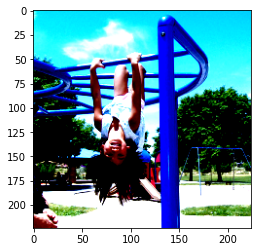

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a young boy wearing a blue shirt is jumping over a snowy hill

BLEU score:
0.2980320760201249



/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


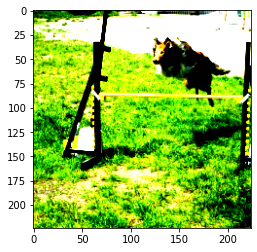

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog is running through the grass

BLEU score:
0.7097929551830701



/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [1/5], Step [0/301], Loss: 2.8564
Epoch [1/5], Step [10/301], Loss: 3.0524
Epoch [1/5], Step [20/301], Loss: 2.9356
Epoch [1/5], Step [30/301], Loss: 3.0969
Epoch [1/5], Step [40/301], Loss: 3.1017
Epoch [1/5], Step [50/301], Loss: 3.0984
Epoch [1/5], Step [60/301], Loss: 3.0422
Epoch [1/5], Step [70/301], Loss: 2.9961
Epoch [1/5], Step [80/301], Loss: 2.9199
Epoch [1/5], Step [90/301], Loss: 2.8650
Epoch [1/5], Step [100/301], Loss: 2.8923
Epoch [1/5], Step [110/301], Loss: 2.9086
Epoch [1/5], Step [120/301], Loss: 2.8393
Epoch [1/5], Step [130/301], Loss: 2.8670
Epoch [1/5], Step [140/301], Loss: 2.7948
Epoch [1/5], Step [150/301], Loss: 2.8433
Epoch [1/5], Step [160/301], Loss: 2.7993
Epoch [1/5], Step [170/301], Loss: 2.8694
Epoch [1/5], Step [180/301], Loss: 2.9098
Epoch [1/5], St

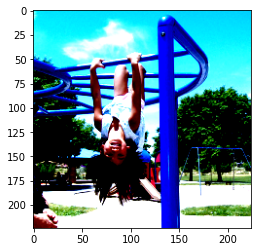

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a young boy in a blue shirt is jumping over a swing

BLEU score:
0.317023313852343



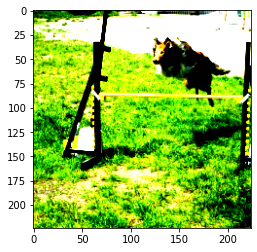

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog is running through a field

BLEU score:
0.6115382211284086

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [2/5], Step [0/301], Loss: 2.6705
Epoch [2/5], Step [10/301], Loss: 2.6586
Epoch [2/5], Step [20/301], Loss: 2.6464
Epoch [2/5], Step [30/301], Loss: 2.6202
Epoch [2/5], Step [40/301], Loss: 2.6302
Epoch [2/5], Step [50/301], Loss: 2.6233
Epoch [2/5], Step [60/301], Loss: 2.5967
Epoch [2/5], Step [70/301], Loss: 2.5709
Epoch [2/5], Step [

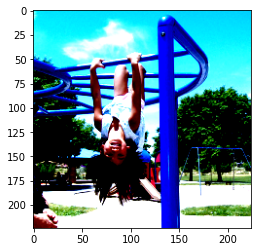

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a little girl in a pink shirt is jumping on a swing

BLEU score:
0.5773502691896257



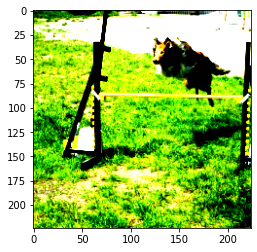

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog is jumping over a hurdle

BLEU score:
0.7875645945599546

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [3/5], Step [0/301], Loss: 2.4909
Epoch [3/5], Step [10/301], Loss: 2.3744
Epoch [3/5], Step [20/301], Loss: 2.4226
Epoch [3/5], Step [30/301], Loss: 2.4889
Epoch [3/5], Step [40/301], Loss: 2.4170
Epoch [3/5], Step [50/301], Loss: 2.4222
Epoch [3/5], Step [60/301], Loss: 2.4727
Epoch [3/5], Step [70/301], Loss: 2.3096
Epoch [3/5], Step [80

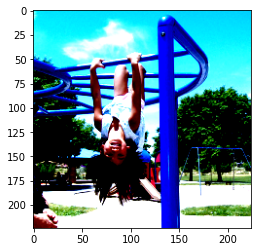

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a little girl is swinging on a swing

BLEU score:
0.7071067811865476



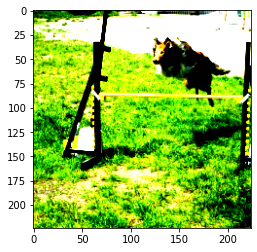

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog jumps over a hurdle

BLEU score:
0.4991521688112304

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [4/5], Step [0/301], Loss: 2.2980
Epoch [4/5], Step [10/301], Loss: 2.1500
Epoch [4/5], Step [20/301], Loss: 2.1712
Epoch [4/5], Step [30/301], Loss: 2.2006
Epoch [4/5], Step [40/301], Loss: 2.3199
Epoch [4/5], Step [50/301], Loss: 2.2719
Epoch [4/5], Step [60/301], Loss: 2.1743
Epoch [4/5], Step [70/301], Loss: 2.2405
Epoch [4/5], Step [80/301]

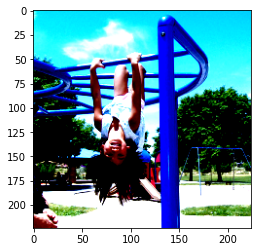

REFERENCE CAPTIONS:
------------------------------------------------------------
a child playing on the monkey bars at a playground with an adult present
a girl hangs on the bars
a kid hangs upside down on the monkey bars at a playground
a young children hanging upside at the playground
girl hanging upside down on blue monkey bars
------------------------------------------------------------

GENERATED CAPTIONS:
a little boy in a blue shirt is jumping on a swing

BLEU score:
0.5773502691896257



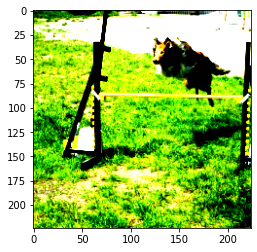

REFERENCE CAPTIONS:
------------------------------------------------------------
a brown and white sheltie leaping over a rail
a collie is running through an obstacle course
collie jumping over a training hurdle that is on the grass
collie making a jump over a yellow hurdle
the dog is leaping over a hurdle
------------------------------------------------------------

GENERATED CAPTIONS:
a dog jumps over a hurdle in a field

BLEU score:
0.39362624168084953



In [0]:
train_model_lstm()

In [0]:
#remove saved model
# !rm -rf "/content/drive/My Drive/Artificial Intelligence/CW2/model path/"

####visualise loss for RNN and LSTM
The code execute the model 5 times and calculate the average number of loss for each epoch

In [0]:
def get_total_loss(RNNloss, LSTMloss):
  '''run model 5 times, get average loss'''
  global rnn_loss, lstm_loss, total_rnn_loss, total_lstm_loss
  total_rnn_loss = []
  total_lstm_loss = []
  total_rnn_loss.append(RNNloss)
  total_lstm_loss.append(LSTMloss)

  while len(total_rnn_loss)< 5: #run it 5 times
    rnn_loss = []
    lstm_loss = []
    build_models()
    train_model_rnn()
    train_model_lstm()
    total_rnn_loss.append(rnn_loss)
    total_lstm_loss.append(lstm_loss)


# get_total_loss(rnn_loss,lstm_loss)
# ave_rnn_loss = np.mean(total_rnn_loss, axis=0) #get average value
# ave_lstm_loss = np.mean(total_lstm_loss, axis=0)

In [0]:
def visualise_loss():
  '''visualise loss of RNN and LSTM'''
  epochs = []
  for i in range(1, num_epochs+1):
    epochs.append(i)
  plt.figure(figsize=(6, 5))
  plt.xticks([i for i in range(1,num_epochs+1)],[i for i in range(1,num_epochs+1)])
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.plot(epochs, ave_rnn_loss, c = 'red', label = 'RNN')
  plt.plot(epochs, ave_lstm_loss, c = 'blue', label = 'LSTM')
  plt.title("loss for RNN and LSTM")
  plt.legend()
  plt.show()

In [0]:
# visualise_loss()

####Compare the BLEU scores for RNN and LSTM


In [0]:
#get average and max BLEU score for each eopch for RNN and LSTM
ave_rnn_bleu = [] 
ave_lstm_bleu = []
max_rnn_bleu = []
max_lstm_bleu = []

for i in range(len(rnn_bleu)):
  ave_rnn_bleu.append(np.mean(rnn_bleu[i])) #get average
  ave_lstm_bleu.append(np.mean(lstm_bleu[i]))
  max_rnn_bleu.append(max(rnn_bleu[i]))    #get max
  max_lstm_bleu.append(max(lstm_bleu[i]))

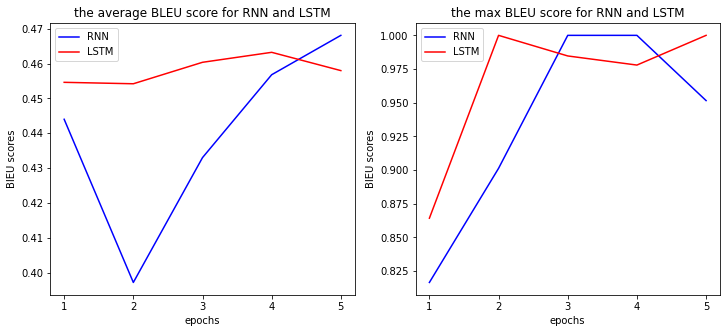

In [0]:
def visualise_bleu():
  '''visualise BLEU scores of RNN and LSTM'''
  epochs = []
  for i in range(1, num_epochs+1):
    epochs.append(i)
  f = plt.figure(figsize=(12,5))

  ax = f.add_subplot(121)
  plt.xlabel("epochs")
  plt.ylabel("BlEU scores")
  plt.xticks([i for i in range(1,num_epochs+1)],[i for i in range(1,num_epochs+1)])
  ax.plot(epochs, ave_rnn_bleu, c = 'blue', label = 'RNN')
  ax.plot(epochs, ave_lstm_bleu, c = 'red', label = 'LSTM')
  plt.title("the average BLEU score for RNN and LSTM")
  plt.legend()

  ax2 = f.add_subplot(122)
  plt.xlabel("epochs")
  plt.ylabel("BlEU scores")
  plt.xticks([i for i in range(1,num_epochs+1)],[i for i in range(1,num_epochs+1)])
  ax2.plot(epochs, max_rnn_bleu, c = 'blue', label = 'RNN')
  ax2.plot(epochs, max_lstm_bleu, c = 'red', label = 'LSTM')
  plt.title("the max BLEU score for RNN and LSTM")
  plt.legend()
  plt.show()


visualise_bleu()

####Compare the quality of generated captions for RNN and LSTM

In [0]:
encoder = encoder.eval()
for i, (images, captions, lengths) in enumerate(test_loader): #load data from test set 
  images = images.to(device)
  features = encoder(images)
  if i % 5 == 0:  #one generate caption - five reference captions for each iamge
    reference = []
    reference_caption_path = 'test_loader.dataset.df.caption[{}:{}]'.format(i,i+5)
    reference_caption = eval(reference_caption_path)
    display_image(images)
    caption_rnn = generate_predict(features, decoder_rnn) #RNN generated caption
    caption_lstm = generate_predict(features, decoder_lstm)#LSTM generated caption
    for j in reference_caption:
      reference.append(j.split())
    score_rnn = sentence_bleu(reference, caption_rnn.split(), weights = (0.5,0.25,0.15,0.1))
    score_lstm = sentence_bleu(reference, caption_lstm.split(), weights = (0.5,0.25,0.15,0.1))
    print('RNN:'+caption_rnn,end = '  ')
    print('score:'+str(score_rnn))
    print('LSTM:'+caption_lstm,end = '  ')
    print('score:'+str(score_lstm),end = '\n\n')
encoder = encoder.train()

####Visualise performance on long captions vs. short captions. 

In [0]:
def get_ave_list(list):
  for i in range(len(list)):
    list[i] = np.mean(list[i])
  return list

In [0]:
short_ave_rnn = get_ave_list(short_score_rnn)
long_ave_rnn = get_ave_list(long_score_rnn)
short_ave_lstm = get_ave_list(short_score_lstm)
long_ave_lstm = get_ave_list(long_score_lstm)
print(short_ave_rnn)
print(long_ave_rnn)
print(short_ave_lstm)
print(long_ave_lstm)

[0.35022815156317416, 0.34265065320350074, 0.3435102741012494, 0.33184486842925515, 0.34375810530015677]
[0.30280592749550084, 0.2621375892864209, 0.28353557096721516, 0.29418801408390527, 0.2995000211693491]
[0.32099276983857256, 0.33412679621772634, 0.3348047537099018, 0.33070038949478553, 0.3241329710886638]
[0.295478203394724, 0.2985549465651204, 0.29295230527601795, 0.2928158644967627, 0.2931147817014623]


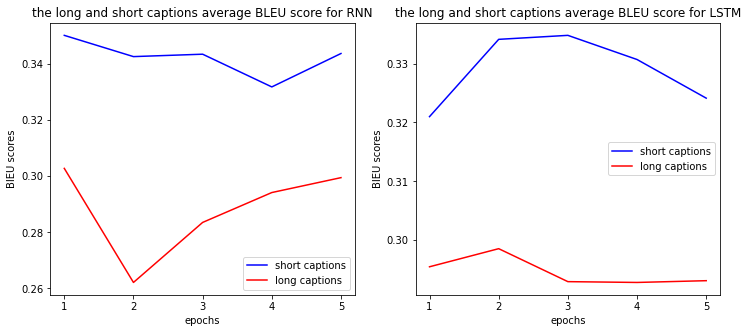

In [0]:
def length_caption_scores():
  '''visualise BLEU scores of RNN and LSTM for short and long captions'''
  epochs = []
  for i in range(1, num_epochs+1):
    epochs.append(i)
  f = plt.figure(figsize=(12,5))

  ax = f.add_subplot(121)
  plt.xlabel("epochs")
  plt.ylabel("BlEU scores")
  plt.xticks([i for i in range(1,num_epochs+1)],[i for i in range(1,num_epochs+1)])
  ax.plot(epochs, short_ave_rnn, c = 'blue', label = 'short captions')
  ax.plot(epochs, long_ave_rnn, c = 'red', label = 'long captions')
  plt.title("the long and short captions average BLEU score for RNN")
  plt.legend()

  ax2 = f.add_subplot(122)
  plt.xlabel("epochs")
  plt.ylabel("BlEU scores")
  plt.xticks([i for i in range(1,num_epochs+1)],[i for i in range(1,num_epochs+1)])
  ax2.plot(epochs, short_ave_lstm, c = 'blue', label = 'short captions')
  ax2.plot(epochs, long_ave_lstm, c = 'red', label = 'long captions')
  plt.title("the long and short captions average BLEU score for LSTM")
  plt.legend()
  plt.show()


length_caption_scores()

###Q4 integrate these two files
1. Load these two files and read them in lines
2. Convert these two files in same format: "imageID + captionID + percert of Yes+number of Yeses + number of Noes".
3. Get data for both expert and crowd admit captions for YES
4. Integrate the data into model

In [0]:
#read text files
ExpertAnnotations = '/content/drive/My Drive/Artificial Intelligence/CW2/Dataset/Flickr8k_text/ExpertAnnotations.txt'
CrowdFlowerAnnotations = '/content/drive/My Drive/Artificial Intelligence/CW2/Dataset/Flickr8k_text/CrowdFlowerAnnotations.txt'

#read these two files in lines
expert_lines = read_lines(ExpertAnnotations)
crowd_lines = read_lines(CrowdFlowerAnnotations)


percent_expert_lines = []
for i in range(len(expert_lines)):
  percent_expert_lines.append(expert_lines[i].split())
for i in range(len(crowd_lines)):
  crowd_lines[i] = crowd_lines[i].split()

for i in percent_expert_lines: #convert the form same as crowd file: percent + yes number + no number 
  yes = 0
  no = 0
  for j in i[-3:]:
    if int(j) == 1 or int(j) == 2:
      no += 1
    elif int(j) == 3 or int(j) == 4:
      yes += 1
  i[-3] = yes/(yes+no)
  i[-2] = yes
  i[-1] = no

yes_list = []
no_list = []
diff_list = []
for i in crowd_lines:
  for j in percent_expert_lines:
    if i[0] == j[0] and i[1] == j[1]:
      if float(i[2])>=0.5 and float(j[2])>=0.5:
        yes = [i[0],i[1]]
        yes_list.append(yes)
      elif float(i[2])<0.5 and float(j[2])<0.5:
        no = [i[0],i[1]]
        no_list.append(no)
      else:
        diff = [i[0],i[1]]
        diff_list.append(diff)

print(len(yes_list)) #how many yes caption admit for both expert and crowd
print(len(no_list)) #Noes number
print(len(diff_list)) #评判不一致的个数

406
1538
385


In [0]:
yes_list_id = [] #yes images id 
yes_list_caption = []#yes captions id
for i,img_id in enumerate(yes_list):
  yes_list[i][0] = img_id[0].split('.')[0]
  yes_list[i][1] = img_id[1].split('.')[0]
  yes_list_id.append(yes_list[i][0])
  yes_list_caption.append(yes_list[i][1])
print(yes_list[:10])
print(yes_list_id[:10])
print(yes_list_caption[:10])

[['1119015538_e8e796281e', '416106657_cab2a107a5'], ['1131800850_89c7ffd477', '2345984157_724823b1e4'], ['1131932671_c8d17751b3', '1131932671_c8d17751b3'], ['1131932671_c8d17751b3', '3245460937_2710a82709'], ['115684808_cb01227802', '115684808_cb01227802'], ['1174525839_7c1e6cfa86', '3185409663_95f6b958d8'], ['1174629344_a2e1a2bdbf', '1174629344_a2e1a2bdbf'], ['1298295313_db1f4c6522', '2461616306_3ee7ac1b4b'], ['1298295313_db1f4c6522', '3658427967_6e2e57458d'], ['1322323208_c7ecb742c6', '1322323208_c7ecb742c6']]
['1119015538_e8e796281e', '1131800850_89c7ffd477', '1131932671_c8d17751b3', '1131932671_c8d17751b3', '115684808_cb01227802', '1174525839_7c1e6cfa86', '1174629344_a2e1a2bdbf', '1298295313_db1f4c6522', '1298295313_db1f4c6522', '1322323208_c7ecb742c6']
['416106657_cab2a107a5', '2345984157_724823b1e4', '1131932671_c8d17751b3', '3245460937_2710a82709', '115684808_cb01227802', '3185409663_95f6b958d8', '1174629344_a2e1a2bdbf', '2461616306_3ee7ac1b4b', '3658427967_6e2e57458d', '1322323

In [0]:
rnn_bleu_new = []

In [0]:
def RnnTrain_AddRef():
  global encoder
  total_step = len(train_loader)
  for epoch in range(num_epochs):
      print('Sample captions:',end = '\n--------------------------------------------\n')
      print(images_loader.dataset.df.loc[0,'caption'])
      print(images_loader.dataset.df.loc[1,'caption'],end = '\n--------------------------------------------\n')
      for i, (images, captions, lengths) in enumerate(train_loader): 
          images = images.to(device)
          captions = captions.to(device)
          targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
          features = encoder(images)
          outputs = decoder_rnn(features, captions, lengths)
          loss = criterion(outputs, targets)
          decoder_rnn.zero_grad()
          encoder.zero_grad()
          loss.backward()
          optimizer_rnn.step()
          if i % log_step == 0:
              print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch, num_epochs, i, total_step, loss.item()))
            
      with torch.no_grad(): 
          encoder = encoder.eval()
          scores = []
          for i, (images, captions, lengths) in enumerate(test_loader):
              images = images.to(device)
              features = encoder(images)
              if i % 5 == 0: 
                reference = []
                reference_caption_path = 'test_loader.dataset.df.caption[{}:{}]'.format(i,i+5)
                reference_caption = eval(reference_caption_path)
                image_id = test_loader.dataset.df.image_id[i]
                for j in reference_caption:
                  reference.append(j.split())
                if image_id in yes_list_id: #judege whether the images id in yes image id i.e. the reference captions have more good caption
                  index_id = yes_list_id.index(image_id) #image id index
                  yes_list_caption[index_id]
                  DF_index = data_df[data_df.image_id==yes_list_caption[index_id]].index.tolist()[2] 
                  rf = data_df.caption[DF_index].split()
                  print('original reference:')
                  print(reference)
                  reference.append(rf)
                  print('new reference(append a new reference):')
                  print(reference)
                candidate = generate_predict(features, decoder_rnn).split() 
                score = sentence_bleu(reference, candidate, weights = (0.5,0.25,0.15,0.1))
                scores.append(score) 

          rnn_bleu_new.append(scores)
          encoder = encoder.train() 

In [0]:
RnnTrain_AddRef()

Sample captions:
--------------------------------------------
girl hanging upside down on blue monkey bars
a brown and white sheltie leaping over a rail
--------------------------------------------
Epoch [0/5], Step [0/301], Loss: 8.1617
Epoch [0/5], Step [10/301], Loss: 5.2598
Epoch [0/5], Step [20/301], Loss: 5.0019
Epoch [0/5], Step [30/301], Loss: 4.7976
Epoch [0/5], Step [40/301], Loss: 4.3799
Epoch [0/5], Step [50/301], Loss: 4.3229
Epoch [0/5], Step [60/301], Loss: 3.9303
Epoch [0/5], Step [70/301], Loss: 3.8779
Epoch [0/5], Step [80/301], Loss: 3.7052
Epoch [0/5], Step [90/301], Loss: 3.6566
Epoch [0/5], Step [100/301], Loss: 3.5515
Epoch [0/5], Step [110/301], Loss: 3.5907
Epoch [0/5], Step [120/301], Loss: 3.5266
Epoch [0/5], Step [130/301], Loss: 3.6322
Epoch [0/5], Step [140/301], Loss: 3.4362
Epoch [0/5], Step [150/301], Loss: 3.3154
Epoch [0/5], Step [160/301], Loss: 3.3720
Epoch [0/5], Step [170/301], Loss: 3.2745
Epoch [0/5], Step [180/301], Loss: 3.1918
Epoch [0/5], St

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


original reference:
[['a', 'brown', 'and', 'white', 'sheltie', 'leaping', 'over', 'a', 'rail'], ['a', 'collie', 'is', 'running', 'through', 'an', 'obstacle', 'course'], ['collie', 'jumping', 'over', 'a', 'training', 'hurdle', 'that', 'is', 'on', 'the', 'grass'], ['collie', 'making', 'a', 'jump', 'over', 'a', 'yellow', 'hurdle'], ['the', 'dog', 'is', 'leaping', 'over', 'a', 'hurdle']]
new reference(append a new reference):
[['a', 'brown', 'and', 'white', 'sheltie', 'leaping', 'over', 'a', 'rail'], ['a', 'collie', 'is', 'running', 'through', 'an', 'obstacle', 'course'], ['collie', 'jumping', 'over', 'a', 'training', 'hurdle', 'that', 'is', 'on', 'the', 'grass'], ['collie', 'making', 'a', 'jump', 'over', 'a', 'yellow', 'hurdle'], ['the', 'dog', 'is', 'leaping', 'over', 'a', 'hurdle'], ['a', 'dog', 'jumps', 'over', 'an', 'obstacle']]


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


original reference:
[['a', 'toddler', 'is', 'making', 'a', 'splash', 'inside', 'a', 'blue', 'paddling', 'pool'], ['a', 'young', 'boy', 'wearing', 'blue', 'shorts', 'is', 'splashing', 'is', 'a', 'blue', 'kiddie', 'pool'], ['child', 'in', 'blue', 'trunks', 'splashing', 'in', 'blue', 'kiddie', 'pool'], ['child', 'in', 'kiddie', 'pool', 'splashes', 'water', 'sticks', 'out', 'tongue'], ['the', 'child', 'is', 'splashing', 'water', 'in', 'a', 'small', 'blue', 'pool']]
new reference(append a new reference):
[['a', 'toddler', 'is', 'making', 'a', 'splash', 'inside', 'a', 'blue', 'paddling', 'pool'], ['a', 'young', 'boy', 'wearing', 'blue', 'shorts', 'is', 'splashing', 'is', 'a', 'blue', 'kiddie', 'pool'], ['child', 'in', 'blue', 'trunks', 'splashing', 'in', 'blue', 'kiddie', 'pool'], ['child', 'in', 'kiddie', 'pool', 'splashes', 'water', 'sticks', 'out', 'tongue'], ['the', 'child', 'is', 'splashing', 'water', 'in', 'a', 'small', 'blue', 'pool'], ['child', 'in', 'blue', 'trunks', 'splashing', 'i

## Training the model of lemma dataset 
(this part only work for Q1)



In [0]:
lemma_dataset_images = Flickr8k(
    df=lemma_data_df[(train_size+4):(train_size+6)].reset_index(drop=True),
    vocab=lemma_vocab,
    transform=data_transform,
)

lemma_images_loader = torch.utils.data.DataLoader(
    dataset = lemma_dataset_images,
    batch_size = 1,
    shuffle = False,
    num_workers = 2,
    collate_fn = caption_collate_fn
)

In [0]:
lemma_rnn_bleu = []

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
import os

  # Train the models
def lemma_train_model():
  global encoder
  total_step = len(lemma_train_loader)
  for epoch in range(num_epochs):
      #generates a sample caption from two test set images before any training and after each epoch
      print('Sample captions:',end = '\n--------------------------------------------\n')
      print(lemma_images_loader.dataset.df.loc[0,'caption'])
      print(lemma_images_loader.dataset.df.loc[1,'caption'],end = '\n--------------------------------------------\n')

      for i, (images, captions, lengths) in enumerate(lemma_train_loader): #组合为一个索引序列，同时列出数据和数据下标

          # Set mini-batch dataset
          images = images.to(device)
          captions = captions.to(device)

          # Packed as well as we'll compare to the decoder outputs
          targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]

          # Forward, backward and optimize
          features = encoder(images)
          outputs = decoder_rnn(features, captions, lengths)

          loss = criterion(outputs, targets)
          
          # Zero gradients for both networks
          decoder_rnn.zero_grad() # 梯度清零
          encoder.zero_grad()

          loss.backward()
          optimizer_rnn.step()

          # Print log info
          if i % log_step == 0:
              print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                    .format(epoch, num_epochs, i, total_step, loss.item()))



      with torch.no_grad(): 
          encoder = encoder.eval()
          for i, (images, captions, lengths) in enumerate(lemma_images_loader):
              images = images.to(device)
              features = encoder(images)

              image_path = 'lemma_images_loader.dataset.df.path[{}]'.format(i)
              reference_caption_path = 'lemma_test_loader.dataset.df.caption[{}:{}]'.format(5*i,(5*i)+5)
              reference_caption = eval(reference_caption_path)


              image = mpimg.imread(eval(image_path))
              plt.imshow(image)
              plt.show()

              reference = []
              for j in reference_caption:
                reference.append(j.split())
                rf = j
              candidate = generate_predict(features,decoder_rnn).split()
              print(candidate)
              smooth = SmoothingFunction()  
              # score = sentence_bleu(reference, candidate,smoothing_function=smooth.method1)
              score = sentence_bleu(reference, candidate, weights = (0.5,0.5,0,0))


              Rnn_data = {'Reference(only one is displayed)':rf,
                          'Generated caption':generate_predict(features,decoder_rnn),
                          'BLEU score':score
              }
              Rnn_data_df = pd.DataFrame(Rnn_data, columns=['Reference(only one is displayed)', 'Generated caption', 'BLEU score'], index = [0])
              display(Rnn_data_df)

          #load test loader to generate the BLEU scores    
          scores = []
          for i, (images, captions, lengths) in enumerate(lemma_test_loader):
              images = images.to(device)
              features = encoder(images)

              if i % 5 == 0: #Generate a caption with 5 references of each image
                reference = []
                reference_caption_path = 'lemma_test_loader.dataset.df.caption[{}:{}]'.format(i,i+5)
                reference_caption = eval(reference_caption_path)
                for j in reference_caption:
                  reference.append(j.split())
                candidate = generate_predict(features, decoder_rnn).split() #generated caption for RNN
                score = sentence_bleu(reference, candidate, weights = (0.5,0.5,0,0))
                scores.append(score)       
          lemma_rnn_bleu.append(scores)
          encoder = encoder.train()   

Sample captions:
--------------------------------------------
child in gray sweatshirt hang from metal bar
child be play soccer while an adult look on
--------------------------------------------
Epoch [0/5], Step [0/301], Loss: 8.1905
Epoch [0/5], Step [10/301], Loss: 5.1381
Epoch [0/5], Step [20/301], Loss: 4.8013
Epoch [0/5], Step [30/301], Loss: 4.5391
Epoch [0/5], Step [40/301], Loss: 4.2189
Epoch [0/5], Step [50/301], Loss: 3.9618
Epoch [0/5], Step [60/301], Loss: 3.7850
Epoch [0/5], Step [70/301], Loss: 3.6576
Epoch [0/5], Step [80/301], Loss: 3.6213
Epoch [0/5], Step [90/301], Loss: 3.4744
Epoch [0/5], Step [100/301], Loss: 3.4755
Epoch [0/5], Step [110/301], Loss: 3.5285
Epoch [0/5], Step [120/301], Loss: 3.3909
Epoch [0/5], Step [130/301], Loss: 3.3269
Epoch [0/5], Step [140/301], Loss: 3.2296
Epoch [0/5], Step [150/301], Loss: 3.1694
Epoch [0/5], Step [160/301], Loss: 3.1689
Epoch [0/5], Step [170/301], Loss: 3.2228
Epoch [0/5], Step [180/301], Loss: 3.2143
Epoch [0/5], Step

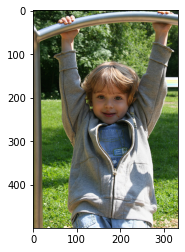

['a', 'tied', 'hill', 'is', 'for', 'to', 'a', 'toddler']


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Reference(only one is displayed),Generated caption,BLEU score
0,child in gray sweatshirt hang from metal bar,a tied hill is for to a toddler,0.231455


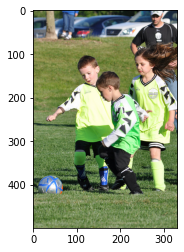

['a', 'them', 'in', 'a', 'over', 'wall', 'is', 'for', 'to', 'a', 'toddler']


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Reference(only one is displayed),Generated caption,BLEU score
0,three child soccer player go for the ball,a them in a over wall is for to a toddler,0.522233


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Sample captions:
--------------------------------------------
child in gray sweatshirt hang from metal bar
child be play soccer while an adult look on
--------------------------------------------
Epoch [1/5], Step [0/301], Loss: 2.9467
Epoch [1/5], Step [10/301], Loss: 2.8460
Epoch [1/5], Step [20/301], Loss: 2.9293
Epoch [1/5], Step [30/301], Loss: 2.8562
Epoch [1/5], Step [40/301], Loss: 3.0072
Epoch [1/5], Step [50/301], Loss: 2.9145
Epoch [1/5], Step [60/301], Loss: 2.7616
Epoch [1/5], Step [70/301], Loss: 2.9325
Epoch [1/5], Step [80/301], Loss: 2.8264
Epoch [1/5], Step [90/301], Loss: 2.7948
Epoch [1/5], Step [100/301], Loss: 2.7685
Epoch [1/5], Step [110/301], Loss: 2.8480
Epoch [1/5], Step [120/301], Loss: 2.8273
Epoch [1/5], Step [130/301], Loss: 2.7570
Epoch [1/5], Step [140/301], Loss: 2.7320
Epoch [1/5], Step [150/301], Loss: 2.8003
Epoch [1/5], Step [160/301], Loss: 2.8352
Epoch [1/5], Step [170/301], Loss: 2.9051
Epoch [1/5], Step [180/301], Loss: 2.6485
Epoch [1/5], Step

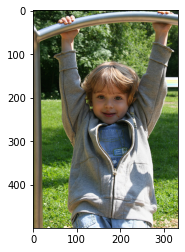

['a', 'small', 'hill', 'in', 'a', 'over', 'wall', 'is', 'shakes', 'a', 'backdrop', 'in', 'a', 'there', 'and', 'into', 'elevator', 'wall']


,Reference(only one is displayed),Generated caption,BLEU score
0,child in gray sweatshirt hang from metal bar,a small hill in a over wall is shakes a backdr...,0.114332


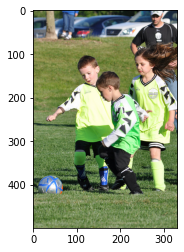

['a', 'small', 'covered', 'in', 'a', 'over', 'wall', 'is', 'doberman', 'to', 'a', 'trying']


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Reference(only one is displayed),Generated caption,BLEU score
0,three child soccer player go for the ball,a small covered in a over wall is doberman to ...,0.408248


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Sample captions:
--------------------------------------------
child in gray sweatshirt hang from metal bar
child be play soccer while an adult look on
--------------------------------------------
Epoch [2/5], Step [0/301], Loss: 2.6219
Epoch [2/5], Step [10/301], Loss: 2.6223
Epoch [2/5], Step [20/301], Loss: 2.5832
Epoch [2/5], Step [30/301], Loss: 2.5808
Epoch [2/5], Step [40/301], Loss: 2.6061
Epoch [2/5], Step [50/301], Loss: 2.5964
Epoch [2/5], Step [60/301], Loss: 2.4956
Epoch [2/5], Step [70/301], Loss: 2.4361
Epoch [2/5], Step [80/301], Loss: 2.4202
Epoch [2/5], Step [90/301], Loss: 2.6444
Epoch [2/5], Step [100/301], Loss: 2.7195
Epoch [2/5], Step [110/301], Loss: 2.4517
Epoch [2/5], Step [120/301], Loss: 2.5888
Epoch [2/5], Step [130/301], Loss: 2.4303
Epoch [2/5], Step [140/301], Loss: 2.6774
Epoch [2/5], Step [150/301], Loss: 2.4922
Epoch [2/5], Step [160/301], Loss: 2.3928
Epoch [2/5], Step [170/301], Loss: 2.4880
Epoch [2/5], Step [180/301], Loss: 2.5229
Epoch [2/5], Step

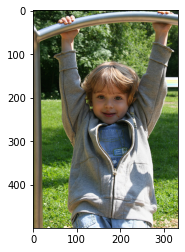

['a', 'tied', 'hill', 'in', 'a', 'there', 'wall', 'is', 'shakes', 'a', 'teen', 'in', 'a', 'mouth']


,Reference(only one is displayed),Generated caption,BLEU score
0,child in gray sweatshirt hang from metal bar,a tied hill in a there wall is shakes a teen i...,0.14825


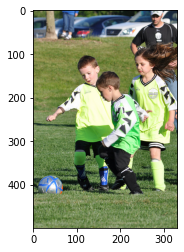

['a', 'covered', 'in', 'a', 'over', 'wall', 'is', 'doberman', 'to', 'a', 'catch']


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Reference(only one is displayed),Generated caption,BLEU score
0,three child soccer player go for the ball,a covered in a over wall is doberman to a catch,0.426401


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Sample captions:
--------------------------------------------
child in gray sweatshirt hang from metal bar
child be play soccer while an adult look on
--------------------------------------------
Epoch [3/5], Step [0/301], Loss: 2.4255
Epoch [3/5], Step [10/301], Loss: 2.5101
Epoch [3/5], Step [20/301], Loss: 2.3956
Epoch [3/5], Step [30/301], Loss: 2.4484
Epoch [3/5], Step [40/301], Loss: 2.4586
Epoch [3/5], Step [50/301], Loss: 2.4950
Epoch [3/5], Step [60/301], Loss: 2.5006
Epoch [3/5], Step [70/301], Loss: 2.4431
Epoch [3/5], Step [80/301], Loss: 2.4537
Epoch [3/5], Step [90/301], Loss: 2.3090
Epoch [3/5], Step [100/301], Loss: 2.4126
Epoch [3/5], Step [110/301], Loss: 2.3417
Epoch [3/5], Step [120/301], Loss: 2.4599
Epoch [3/5], Step [130/301], Loss: 2.2852
Epoch [3/5], Step [140/301], Loss: 2.3845
Epoch [3/5], Step [150/301], Loss: 2.5050
Epoch [3/5], Step [160/301], Loss: 2.3813
Epoch [3/5], Step [170/301], Loss: 2.3771
Epoch [3/5], Step [180/301], Loss: 2.4263
Epoch [3/5], Step

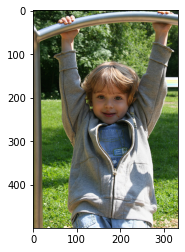

['a', 'small', 'hill', 'in', 'a', 'shaking', 'fallen', 'is', 'wears', 'object', 'of', 'a', 'seaweed', 'side']


,Reference(only one is displayed),Generated caption,BLEU score
0,child in gray sweatshirt hang from metal bar,a small hill in a shaking fallen is wears obje...,0.14825


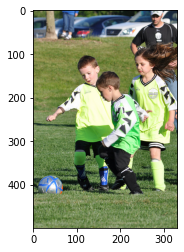

['girl', 'next', 'young', 'as']


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Reference(only one is displayed),Generated caption,BLEU score
0,three child soccer player go for the ball,girl next young as,0.18394


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Sample captions:
--------------------------------------------
child in gray sweatshirt hang from metal bar
child be play soccer while an adult look on
--------------------------------------------
Epoch [4/5], Step [0/301], Loss: 2.3350
Epoch [4/5], Step [10/301], Loss: 2.3519
Epoch [4/5], Step [20/301], Loss: 2.3274
Epoch [4/5], Step [30/301], Loss: 2.3507
Epoch [4/5], Step [40/301], Loss: 2.3501
Epoch [4/5], Step [50/301], Loss: 2.2545
Epoch [4/5], Step [60/301], Loss: 2.2543
Epoch [4/5], Step [70/301], Loss: 2.3624
Epoch [4/5], Step [80/301], Loss: 2.3542
Epoch [4/5], Step [90/301], Loss: 2.3285
Epoch [4/5], Step [100/301], Loss: 2.1947
Epoch [4/5], Step [110/301], Loss: 2.2168
Epoch [4/5], Step [120/301], Loss: 2.3003
Epoch [4/5], Step [130/301], Loss: 2.3123
Epoch [4/5], Step [140/301], Loss: 2.3253
Epoch [4/5], Step [150/301], Loss: 2.1809
Epoch [4/5], Step [160/301], Loss: 2.3226
Epoch [4/5], Step [170/301], Loss: 2.2367
Epoch [4/5], Step [180/301], Loss: 2.2781
Epoch [4/5], Step

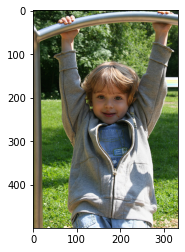

['a', 'tied', 'hill', 'in', 'a', 'shaking', 'wall', 'is', 'young', 'also', 'a', 'lit']


,Reference(only one is displayed),Generated caption,BLEU score
0,child in gray sweatshirt hang from metal bar,a tied hill in a shaking wall is young also a lit,0.174078


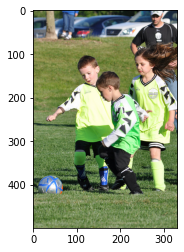

['girl', 'next', 'young', 'as']


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Reference(only one is displayed),Generated caption,BLEU score
0,three child soccer player go for the ball,girl next young as,0.18394


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [0]:
lemma_train_model()